In [122]:
# !pip install azure-storage-blob
# !pip install python-dotenv

import os
from dotenv import load_dotenv
from setup_utils import fetch_data, load_data, create_time_index
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CONNECTION_STRING = os.getenv("CONNECTION_STRING")

load_dotenv()
fetch_data(CONNECTION_STRING)

(
    brand_mapping,
    macro_data,
    brand_constraint,
    pack_constraint,
    segment_constraint,
    sales_data,
    volume_variation_constraint,
) = load_data()

(
    macro_data,
    sales_data,
) = create_time_index([macro_data, sales_data])


data/brand_segment_mapping_hackathon.xlsx
data/macro_data.xlsx
data/maximum_discount_constraint_hackathon.xlsx
data/sales_data_hackathon.xlsx
data/volume_variation_constraint_hackathon.xlsx
data/submission_template_hackathon.csv


# Data  

In [121]:
a.corr()

,volume,net_revenue
volume,1.000000,0.984221
net_revenue,0.984221,1.000000


In [115]:
brand_mapping.brand.nunique()

39

In [114]:
sales_data.brand.nunique()

65

In [118]:
sales_data#[sales_data.promotional_discount>0]

,sku,brand,pack,size,volume,gto,promotional_discount,other_discounts,total_discounts,excise,net_revenue,maco,vilc
date,,,,,,,,,,,,,
2019-01-01,cpENXe,OmUaam,VmwBmS,KNdNVg,242.65,90960986.88,0.000000e+00,-5.982568e+05,-5.982568e+05,-27384810.42,62977919.62,47536325.82,15441593.80
2019-02-01,cpENXe,OmUaam,VmwBmS,KNdNVg,243.38,90879757.60,0.000000e+00,-5.677776e+05,-5.677776e+05,-29352431.76,60959548.21,46750059.93,14209488.28
2019-03-01,cpENXe,OmUaam,VmwBmS,KNdNVg,249.26,94582301.14,1.029412e+05,-6.400859e+05,-5.371447e+05,-27528709.10,66516447.30,52233823.96,14282623.34
2019-04-01,cpENXe,OmUaam,VmwBmS,KNdNVg,199.26,75426202.79,4.388226e+04,-2.914105e+05,-2.475282e+05,-21227275.99,53951398.59,44398209.76,9553188.83
2019-05-01,cpENXe,OmUaam,VmwBmS,KNdNVg,252.94,96540073.40,-2.684249e+05,-4.721547e+05,-7.405796e+05,-26991176.48,68808317.32,57159490.21,11648827.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,oErUSF,ZfEWxz,mmgsXK,LlylGT,NaN,NaN,-1.308953e+07,-8.936375e+05,-1.398317e+07,NaN,NaN,NaN,NaN
2023-07-01,oErUSF,ZfEWxz,mmgsXK,LlylGT,NaN,NaN,-1.404901e+08,-1.887031e+08,-3.291931e+08,NaN,NaN,NaN,NaN
2023-05-01,eOBfjW,ZfEWxz,GUbqnp,XotyGb,52.97,36283138.24,0.000000e+00,-9.310744e+06,-9.310744e+06,-7380086.76,19592307.36,-4914754.68,24507062.04


<AxesSubplot:>

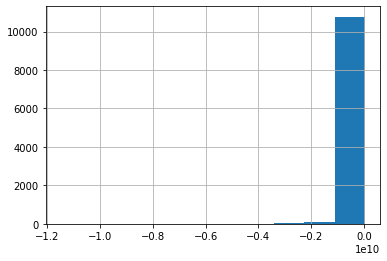

In [110]:
sales_data.promotional_discount.hist()

<AxesSubplot:xlabel='volume', ylabel='net_revenue'>

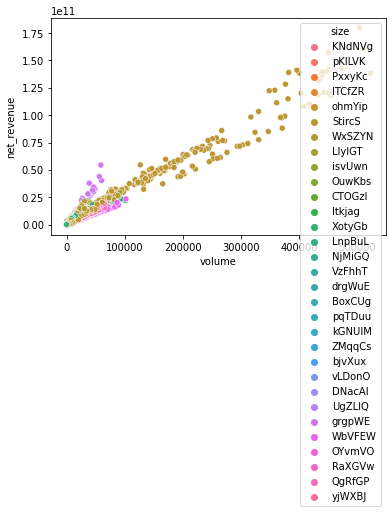

In [108]:
sns.scatterplot(data=sales_data[sales_data.gto.notna()], x="volume", y="net_revenue", hue="size")

In [98]:
a = sales_data[sales_data.gto.notna()][["volume", "net_revenue"]]

In [90]:
volume_variation_constraint

,sku,brand,pack,size,minimum_volume_variation,maximum_volume_variation
0,jpXhdU,LoYUOg,mmgsXK,StircS,-0.595874,0.365638
1,ykzJnG,OmUaam,mmgsXK,CTOGzl,-0.389015,0.298220
2,mFEENn,YZfPPf,gydWlH,StircS,-0.384432,0.343191
3,EWpIvF,ddBknG,mmgsXK,StircS,-0.383206,0.309620
4,NDjGwG,aYZJQW,VmwBmS,pKILVK,-0.382353,0.245059
5,lWqqqR,ZfEWxz,GUbqnp,XotyGb,-0.379754,0.187799
6,nXuqgq,tcqKyp,gydWlH,StircS,-0.679146,0.436493
7,YIKcZa,ZWPpTt,GUbqnp,StircS,-0.579103,0.543964
8,DvLfgO,aYZJQW,gydWlH,StircS,-0.371759,0.119059
9,KYbaDS,ZWPpTt,mmgsXK,LnpBuL,-0.571078,0.259023


In [89]:
pack_constraint

,year,month,pack,max_discount
0,2023,6,GUbqnp,-3.830511e+10
1,2023,6,VmwBmS,-4.456805e+07
2,2023,6,gydWlH,-1.185722e+10
3,2023,6,mmgsXK,-1.313038e+10
4,2023,6,rwGJlW,-2.538664e+08
5,2023,7,GUbqnp,-3.824104e+10
6,2023,7,VmwBmS,-3.855361e+07
7,2023,7,gydWlH,-1.306834e+10
8,2023,7,mmgsXK,-1.336721e+10
9,2023,7,rwGJlW,-1.472351e+08


In [55]:
# 55 months of data - 53 train, 2 test
sales_data.index.nunique()

55

In [66]:
print(brand_mapping.describe())
print(brand_mapping.segment.value_counts())

         brand segment
count       39      39
unique      39       4
top     OmUaam  rBvOre
freq         1      13
rBvOre    13
zLdfYx    11
qtUPAJ     8
FkcKlo     7
Name: segment, dtype: int64


In [87]:
sales_data.brand.nunique(),sales_data.sku.nunique(),sales_data.pack.nunique(),sales_data["size"].nunique()

(65, 444, 5, 31)

In [88]:
sales_data.reset_index()[["brand", "pack", "size"]].drop_duplicates()

,brand,pack,size
0,OmUaam,VmwBmS,KNdNVg
29,XVgSwQ,VmwBmS,KNdNVg
46,ZVDcKH,VmwBmS,pKILVK
101,XVgSwQ,VmwBmS,PxxyKc
103,XVgSwQ,VmwBmS,lTCfZR
...,...,...,...
10700,wXKDHy,GUbqnp,StircS
10803,vjtstb,GUbqnp,XotyGb
10813,ibrwBE,GUbqnp,XotyGb
10837,FPgJHY,GUbqnp,XotyGb


In [34]:
sales_data[['volume', 'gto',
       'promotional_discount', 'other_discounts', 'total_discounts', 'excise',
       'net_revenue', 'maco', 'vilc']].corr()

,volume,gto,promotional_discount,other_discounts,total_discounts,excise,net_revenue,maco,vilc
volume,1.000000,0.988702,-0.576802,-0.594608,-0.720151,-0.993641,0.984221,0.983609,0.913221
gto,0.988702,1.000000,-0.587826,-0.628221,-0.750239,-0.992927,0.997953,0.989330,0.944721
promotional_discount,-0.576802,-0.587826,1.000000,0.307921,0.713368,0.576774,-0.564026,-0.563090,-0.524711
other_discounts,-0.594608,-0.628221,0.307921,1.000000,0.886401,0.597546,-0.598880,-0.540509,-0.691632
total_discounts,-0.720151,-0.750239,0.713368,0.886401,1.000000,0.722293,-0.716998,-0.673709,-0.765703
excise,-0.993641,-0.992927,0.576774,0.597546,0.722293,1.000000,-0.987726,-0.989968,-0.909778
net_revenue,0.984221,0.997953,-0.564026,-0.598880,-0.716998,-0.987726,1.000000,0.990754,0.948079
maco,0.983609,0.989330,-0.563090,-0.540509,-0.673709,-0.989968,0.990754,1.000000,0.896164
vilc,0.913221,0.944721,-0.524711,-0.691632,-0.765703,-0.909778,0.948079,0.896164,1.000000


In [32]:
sales_data.reset_index().groupby("date")[['volume', 'gto',
       'promotional_discount', 'other_discounts', 'total_discounts', 'excise',
       'net_revenue', 'maco', 'vilc']].sum().corr()

,volume,gto,promotional_discount,other_discounts,total_discounts,excise,net_revenue,maco,vilc
volume,1.000000,0.978643,-0.134761,-0.014200,-0.097958,-0.992109,0.971151,0.977800,0.862373
gto,0.978643,1.000000,-0.173215,-0.111739,-0.196936,-0.991447,0.997426,0.968677,0.935813
promotional_discount,-0.134761,-0.173215,1.000000,0.004471,0.650249,0.140485,-0.150385,-0.117701,-0.181024
other_discounts,-0.014200,-0.111739,0.004471,1.000000,0.762621,0.044355,-0.102085,-0.009587,-0.221911
total_discounts,-0.097958,-0.196936,0.650249,0.762621,1.000000,0.124571,-0.174834,-0.083418,-0.285687
excise,-0.992109,-0.991447,0.140485,0.044355,0.124571,1.000000,-0.985759,-0.973156,-0.902602
net_revenue,0.971151,0.997426,-0.150385,-0.102085,-0.174834,-0.985759,1.000000,0.970095,0.939753
maco,0.977800,0.968677,-0.117701,-0.009587,-0.083418,-0.973156,0.970095,1.000000,0.828673
vilc,0.862373,0.935813,-0.181024,-0.221911,-0.285687,-0.902602,0.939753,0.828673,1.000000


In [28]:
# sales_data.reset_index().groupby(["date", "brand"]).volume.sum().unstack(1).plot(backend="plotly")

In [30]:
macro_data.loc[sales_data.index.unique(),:].sort_index().corr()

,retail_sales_index,unemployment_rate,cpi,private_consumption,gross_domestic_saving,brad_money,gdp
retail_sales_index,1.000000,-0.590355,0.740710,0.932294,-0.471074,0.769840,0.908037
unemployment_rate,-0.590355,1.000000,-0.327741,-0.642979,-0.286697,-0.153187,-0.756732
cpi,0.740710,-0.327741,1.000000,0.807938,-0.542444,0.929367,0.763419
private_consumption,0.932294,-0.642979,0.807938,1.000000,-0.480467,0.815685,0.981409
gross_domestic_saving,-0.471074,-0.286697,-0.542444,-0.480467,1.000000,-0.780804,-0.311481
brad_money,0.769840,-0.153187,0.929367,0.815685,-0.780804,1.000000,0.718343
gdp,0.908037,-0.756732,0.763419,0.981409,-0.311481,0.718343,1.000000
